In [1]:
import sys
import pickle
sys.path.append("/home/john/udacity/classes/05-Into_to_Machine_Learning/tools/")
sys.path.append("/home/john/udacity/classes/05-Into_to_Machine_Learning/final_project/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from __future__ import division

# Load data

In [2]:
import pickle
data_dict = pickle.load(open("final_project/final_project_dataset.pkl", "rb") )

In [3]:
import pandas as pd
df = pd.DataFrame(data_dict).T
float_columns = [c for c in df.columns if c not in ['email_address', 'poi']]
df[float_columns] = df[float_columns].astype(float)
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


# Explore

## List and Categorize Features

In [4]:
financial_features = ['salary', 'deferral_payments', 'total_payments',
                      'loan_advances', 'bonus', 'restricted_stock_deferred',
                      'deferred_income', 'total_stock_value', 'expenses',
                      'exercised_stock_options', 'other', 'long_term_incentive',
                      'restricted_stock', 'director_fees']

email_features = ['to_messages', 'email_address', 'from_poi_to_this_person',
                  'from_messages', 'from_this_person_to_poi',
                  'shared_receipt_with_poi']

## Class Distribution

In [5]:
print("{} of {} are POIs".format(sum(df['poi']), len(df)))

18 of 146 are POIs


## Missing data

In [6]:
feature_nan = 1-df.count()/len(df)
feature_nan = feature_nan.sort_values()
print("Percent Missing\n-----")
print(feature_nan.head(30))

Percent Missing
-----
email_address                0.000000
poi                          0.000000
total_stock_value            0.136986
total_payments               0.143836
restricted_stock             0.246575
exercised_stock_options      0.301370
salary                       0.349315
expenses                     0.349315
other                        0.363014
to_messages                  0.410959
shared_receipt_with_poi      0.410959
from_messages                0.410959
from_poi_to_this_person      0.410959
from_this_person_to_poi      0.410959
bonus                        0.438356
long_term_incentive          0.547945
deferred_income              0.664384
deferral_payments            0.732877
restricted_stock_deferred    0.876712
director_fees                0.883562
loan_advances                0.972603
dtype: float64


In [7]:
people_nan = df.count(axis=1)/len(df.columns)
people_nan = people_nan.sort_values()
print("Percent of Non-Missing Features per Person\n-----")
print(people_nan.head(10))

Percent of Non-Missing Features per Person
-----
LOCKHART EUGENE E                0.095238
SCRIMSHAW MATTHEW                0.190476
WROBEL BRUCE                     0.190476
WHALEY DAVID A                   0.190476
THE TRAVEL AGENCY IN THE PARK    0.190476
WODRASKA JOHN                    0.190476
GRAMM WENDY L                    0.190476
CHRISTODOULOU DIOMEDES           0.238095
CLINE KENNETH W                  0.238095
GILLIS JOHN                      0.238095
dtype: float64


## Outliers 

In [8]:
#Perform a simple check to see which rows have outliers, assuming normal distribution
zscores = df.apply(lambda row: (row-df.mean())/df.std(), axis=1)
for idx, row in zscores.iterrows():
    if max(row) >= 4:
        col = row.idxmax()
        val = row[row.idxmax()]
        print("{} has high '{}' value of {} (z-score of {})".format(idx, col, df[col][idx], val))
    if min(row) <= -4:
        col = row.idxmin()
        val = row[row.idxmin()]
        print("{} has low '{}' value of {} (z-score of {})".format(idx, col, df[col][idx], val))

DELAINEY DAVID W has high 'from_this_person_to_poi' value of 609.0 (z-score of 5.67352642171)
KAMINSKI WINCENTY J has high 'from_messages' value of 14368.0 (z-score of 7.47363149225)
KEAN STEVEN J has high 'to_messages' value of 12754.0 (z-score of 4.13525979734)
LAVORATO JOHN J has high 'from_poi_to_this_person' value of 528.0 (z-score of 5.32431220222)
SHAPIRO RICHARD S has high 'to_messages' value of 15149.0 (z-score of 5.06258356331)
TOTAL has high 'total_stock_value' value of 434509511.0 (z-score of 10.9794663182)
TOTAL has low 'deferred_income' value of -27992891.0 (z-score of -6.67073416501)


In [9]:
#Drop and Re-check
df = df.drop('TOTAL')
df = df.drop('THE TRAVEL AGENCY IN THE PARK')

#Perform a simple check to see which rows have outliers, assuming normal distribution
zscores = df.apply(lambda row: (row-df.mean())/df.std(), axis=1)
for idx, row in zscores.iterrows():
    if max(row) >= 4:
        col = row.idxmax()
        val = row[row.idxmax()]
        print("{} has high '{}' value of {} (z-score of {})".format(idx, col, df[col][idx], val))
    if min(row) <= -4:
        col = row.idxmin()
        val = row[row.idxmin()]
        print("{} has low '{}' value of {} (z-score of {})".format(idx, col, df[col][idx], val))

DELAINEY DAVID W has high 'from_this_person_to_poi' value of 609.0 (z-score of 5.67352642171)
FREVERT MARK A has high 'other' value of 7427621.0 (z-score of 4.98163159998)
KAMINSKI WINCENTY J has high 'from_messages' value of 14368.0 (z-score of 7.47363149225)
KEAN STEVEN J has high 'to_messages' value of 12754.0 (z-score of 4.13525979734)
LAVORATO JOHN J has high 'from_poi_to_this_person' value of 528.0 (z-score of 5.32431220222)
LAY KENNETH L has high 'total_payments' value of 103559793.0 (z-score of 10.5954047506)
SHAPIRO RICHARD S has high 'to_messages' value of 15149.0 (z-score of 5.06258356331)
SKILLING JEFFREY K has high 'salary' value of 1111258.0 (z-score of 4.66982018198)
WHITE JR THOMAS E has high 'restricted_stock' value of 13847074.0 (z-score of 5.64486498335)


In [10]:
#Remove "THE TRAVEL AGENCY IN THE PARK" since it isn't a person
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')
#Remove "Total" row
data_dict.pop('TOTAL')

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

# Create New Features

In [11]:
def fillzero(value):
    if value == 'NaN':
        return 0
    else:
        return value

for k,v in data_dict.items():
    v['from_poi_norm'] = float(v['from_poi_to_this_person'])/float(v['from_messages'])
    v['to_poi_norm'] = float(v['from_this_person_to_poi'])/float(v['to_messages'])
    v['shared_poi_norm'] = float(v['shared_receipt_with_poi'])/float(v['to_messages'])
    v['email_info_available'] = 1 if v['to_messages']!='NaN' else 0
    for ff in financial_features:
        v[ff+"_fill0"] = fillzero(v[ff])

In [12]:
my_dataset = data_dict

# Prep Data

In [13]:
features_list = ['poi'] + [ff+'_fill0' for ff in financial_features] +\
                ['from_poi_norm', 'to_poi_norm', 'shared_poi_norm', 'email_info_available']

In [14]:
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Try multiple classifiers

Each classifier pipeline will be optimized using a smaller StratifiedShuffleSplit.
The classifier will then be tested with a larger StratifiedShuffleSplit with precision and recall plotted as a boxplot.

## Cross-Validation Setup

In [15]:
from sklearn.cross_validation import StratifiedShuffleSplit, cross_val_score
sss_fit = StratifiedShuffleSplit(labels, 30, test_size=0.3, random_state=0)
sss_test = StratifiedShuffleSplit(labels, 1000, test_size=0.3, random_state=0)

import matplotlib.pyplot as plt
%matplotlib inline
def test_clf(clf):
    """Test classifier with sss"""
    precision = cross_val_score(clf, features, labels, 'precision', sss_test)
    recall = cross_val_score(clf, features, labels, 'recall', sss_test)
    mean = lambda a: sum(a)/len(a)
    print("Mean Precision is {:.4}".format(mean(precision)))
    print("Mean Recall is {:.4}".format(mean(recall)))
    plt.boxplot([precision, recall], labels=['Precision', 'Recall'])

In [16]:
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV

## Decision Tree

/home/john/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'decisiontreeclassifier__min_samples_leaf': 3, 'decisiontreeclassifier__min_samples_split': 5}
Mean Precision is 0.3209
Mean Recall is 0.2663
--------------------
salary_fill0 = 0.2681
deferral_payments_fill0 = 0.1713
total_payments_fill0 = 0.1671
loan_advances_fill0 = 0.1602
bonus_fill0 = 0.1284
restricted_stock_deferred_fill0 = 0.05674
deferred_income_fill0 = 0.04817
total_stock_value_fill0 = 0.0
expenses_fill0 = 0.0
exercised_stock_options_fill0 = 0.0
other_fill0 = 0.0
long_term_incentive_fill0 = 0.0
restricted_stock_fill0 = 0.0
director_fees_fill0 = 0.0
from_poi_norm = 0.0
to_poi_norm = 0.0
shared_poi_norm = 0.0
email_info_available = 0.0


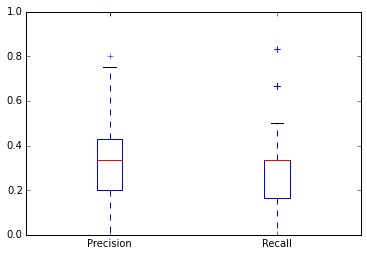

In [17]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'decisiontreeclassifier__min_samples_split':range(2,12),
              'decisiontreeclassifier__min_samples_leaf':range(1,8)}
pipe = make_pipeline(Imputer(), DecisionTreeClassifier())
clf = GridSearchCV(pipe, parameters, cv=sss_fit, scoring='f1')
clf.fit(features, labels)
print(clf.best_params_)

clf = clf.best_estimator_
test_clf(clf)

print('-'*20)
selected_features = clf.get_params()['decisiontreeclassifier'].feature_importances_
for idx, sf in enumerate(sorted(selected_features, reverse=True)):
    print("{} = {:.4}".format(features_list[idx+1], sf))

## SVC

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 200 jobs       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 450 jobs       | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 800 jobs       | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done 1250 jobs       | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 1800 jobs       | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 2450 jobs       | elapsed:    9.3s
[Parallel(n_jobs=1)]: Done 3200 jobs       | elapsed:   12.1s
[Parallel(n_jobs=1)]: Done 4050 jobs       | elapsed:   15.3s
[Parallel(n_jobs=1)]: Done 5000 jobs       | elapsed:   19.0s
[Parallel(n_jobs=1)]: Done 6050 jobs       | elapsed:   23.0s
[Parallel(n_jobs=1)]: Done 7200 jobs       | elapsed:   27.5s
[Parallel(n_jobs=1)]: Done 8450 jobs       | elapsed:   32.2s
[Parallel(n_jobs=1)]: Done 9800 jobs       | elapsed:   37.6s
[Parallel(n_jobs=1)]: Done 11250 jobs       | elapsed:   43.5s
[Parallel(n_

Fitting 30 folds for each of 462 candidates, totalling 13860 fits
{'svc__gamma': 10, 'selectkbest__k': 3, 'svc__C': 10}
Mean Precision is 0.3455
Mean Recall is 0.1285
['bonus_fill0', 'total_stock_value_fill0', 'exercised_stock_options_fill0']


/home/john/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:111: UserWarning: Features [3] are constant.
  UserWarning)


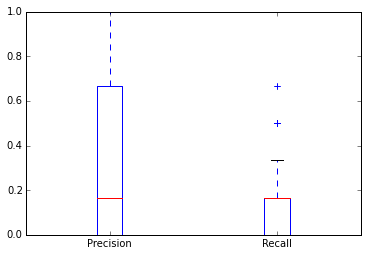

In [18]:
from sklearn.svm import SVC

pipe = make_pipeline(Imputer(), StandardScaler(), SelectKBest(), SVC(kernel='rbf'))
parameters = {'selectkbest__k':range(3,14),
              'svc__C':[10**n for n in range(-3,3)],
              'svc__gamma':[10**n for n in range(-4,3)]
             }

clf = GridSearchCV(pipe, parameters, cv=sss_fit, verbose=1, scoring='f1')
clf.fit(features, labels)
print(clf.best_params_)

clf = clf.best_estimator_
test_clf(clf)

selected_features = clf.get_params()['selectkbest'].get_support(indices=True)
print([features_list[i+1] for i in selected_features]) #add 1 to ignore 'poi'

## Gaussian NB

{'selectkbest__k': 7}
Mean Precision is 0.405
Mean Recall is 0.3145
['salary_fill0', 'bonus_fill0', 'deferred_income_fill0', 'total_stock_value_fill0', 'exercised_stock_options_fill0', 'long_term_incentive_fill0', 'restricted_stock_fill0']


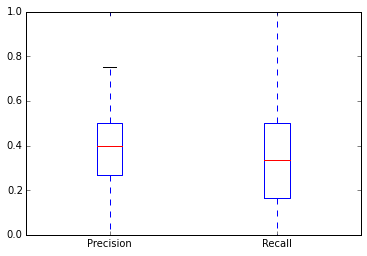

In [19]:
from sklearn.naive_bayes import GaussianNB
pipe = make_pipeline(Imputer(), StandardScaler(), SelectKBest(), GaussianNB())
parameters = {'selectkbest__k':range(3,14)}

clf = GridSearchCV(pipe, parameters, cv=sss_fit)
clf.fit(features, labels)
print(clf.best_params_)

clf = clf.best_estimator_
test_clf(clf)

selected_features = clf.get_params()['selectkbest'].get_support(indices=True)
print([features_list[i+1] for i in selected_features]) #add 1 to ignore 'poi'